---
title: "Random Search"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-09"
categories: [python, datacamp, machine learning, deep learning, hyperparameter, random search]
image: "randomSearch.png"

---

# Random Search

In this chapter, you will be introduced to another popular automated hyperparameter tuning method known as Random Search. You will learn what it is, how it works, and how it differs from grid search. You will learn about the advantages and disadvantages of this method and when to choose it over Grid Search. In this lesson, you will practice conducting a Random Search using Scikit Learn, as well as visualizing and interpreting the results.

This **Random Search** is part of [Datacamp course: Hyperparameter Tuning in Python] Hyperparameters play a significant role in the development of powerful machine learning models. However, with increasingly complex models with numerous options available, how can you efficiently identify the best settings for your particular issue? You will gain practical experience using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. Among these are Grid Search, Random Search, and advanced optimization methodologies such as Bayesian and Genetic algorithms. To dramatically increase the efficiency and effectiveness of your machine learning model creation, you will use a dataset predicting credit card defaults.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Hyperparameter Tuning in Python]: (https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python)

In [1]:
import numpy as np
import pandas as pd

# Introducting Random Search

* Similar to grid search:
    * Define an estimator, which hyperparameters to tune and the range of values for each hyperparameter.
    * Set a Cross-Validation scheme and scoring function
Note - This paper shows empirically and theoretically that randomly chosen trials are more efficient for hyperparmeter optimization than trials on a grid search (Bengio & Bergstra (2012))

* Two main reason:1. Not every hyperparameter is as important 2. A little trick of probability

## Randomly Sample Hyperparameters
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search.

You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

In [2]:
from itertools import product
from pprint import pprint

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a randomsearch
random_combinations_index = np.random.choice(range(0, len(combinations_list)),
                                             30, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
pprint(combinations_random_chosen)

[[0.9384422110552764, 17],
 [0.8635678391959799, 18],
 [0.7812060301507537, 31],
 [1.4401005025125628, 14],
 [0.3094974874371859, 10],
 [1.4251256281407034, 19],
 [1.3577386934673366, 14],
 [1.4925125628140703, 10],
 [0.9010050251256281, 35],
 [0.796180904522613, 26],
 [1.178040201005025, 22],
 [0.5490954773869346, 26],
 [1.095678391959799, 18],
 [0.42180904522613066, 10],
 [0.3768844221105528, 25],
 [1.372713567839196, 36],
 [1.095678391959799, 22],
 [1.0058291457286432, 13],
 [0.06241206030150754, 40],
 [0.6464321608040201, 25],
 [0.5715577889447236, 32],
 [0.4292964824120603, 27],
 [0.5715577889447236, 17],
 [1.1555778894472362, 34],
 [1.1930150753768844, 35],
 [0.017487437185929648, 24],
 [0.5116582914572865, 13],
 [0.2121608040201005, 12],
 [0.668894472361809, 13],
 [1.1106532663316582, 16]]


## Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

In [4]:
import random
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['gini', 'sqrt', 49], ['entropy', 'auto', 40], ['gini', 'auto', 53], ['gini', 'log2', 55], ['entropy', 'log2', 25], ['entropy', 'sqrt', 11], ['entropy', 'log2', 27], ['gini', 'log2', 22], ['entropy', 'auto', 21], ['gini', 'auto', 49], ['gini', 'auto', 31], ['entropy', None, 5], ['gini', 'sqrt', 20], ['entropy', 'auto', 25], ['entropy', 'auto', 24], ['entropy', 'sqrt', 42], ['gini', 'sqrt', 28], ['entropy', None, 40], ['entropy', None, 31], ['gini', 'sqrt', 55], ['entropy', 'sqrt', 26], ['gini', None, 29], ['gini', 'sqrt', 44], ['gini', 'sqrt', 26], ['entropy', None, 35], ['gini', 'auto', 47], ['gini', 'auto', 13], ['gini', None, 9], ['entropy', 'sqrt', 5], ['gini', 'log2', 47], ['gini', 'sqrt', 5], ['gini', 'log2', 36], ['entropy', 'log2', 55], ['gini', None, 24], ['gini', 'log2', 19], ['gini', 'auto', 7], ['entropy', None, 37], ['entropy', 'sqrt', 8], ['gini', None, 27], ['gini', 'auto', 24], ['gini', 'auto', 19], ['gini', 'log2', 44], ['gini', 'log2', 18], ['entropy', 'log2', 21], [

## Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function sample_and_visualize_hyperparameters() takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

In [5]:
import matplotlib.pyplot as plt

def sample_and_visualize_hyperparameters(n_samples):
    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot
    plt.clf()
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 1.5])
    plt.gca().set_ylim([10, 29])

4000


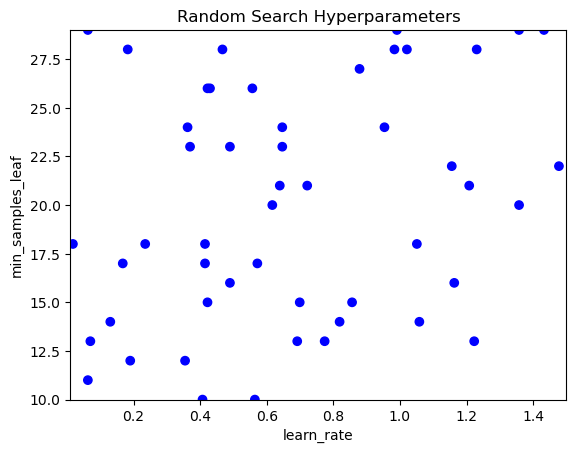

In [8]:
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 30))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(50)

# Random Search in Scikit Learn
* Comparing to GridSearchCV
    * Decide an algorithm/estimator
    * Define which hyperparameters we will tune
    * Define a range of values for each hyperparameter
    * Setting a Cross-Validation scheme
    * Define a score function
    * Include extra useful information or function
* In Random Search,
    * Decide how many samples to take and sample it

## The RandomizedSearchCV Object
Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

The desired options are:

* A default Gradient Boosting Classifier Estimator
* 5-fold cross validation
* Use accuracy to score the models
* Use 4 cores for processing in parallel
* Ensure you refit the best model and return training scores
* Randomly sample 10 models
The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64).

In [9]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('dataset/credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150),
              'min_samples_leaf': list(range(20, 65))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy', n_jobs=4, cv=5, refit=True, return_train_score=True
)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.9416107382550335 0.7375838926174496 1.719463087248322
 0.7885906040268456 1.8469798657718122 1.6684563758389261
 0.3932885906040269 0.22751677852348992 0.7248322147651006
 0.11275167785234899]
[20 46 37 47 28 26 51 35 57 48]


## RandomizedSearchCV in Scikit Learn
Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

* A RandomForestClassifier Estimator with n_estimators of 80.
* 3-fold cross validation (cv)
* Use roc_auc to score the models
* Use 4 cores for processing in parallel (n_jobs)
* Ensure you refit the best model and return training scores
* Only sample 5 models for efficiency (n_iter)
Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26)), 'max_features': ['auto', 'sqrt']}

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=80),
    param_distributions=param_grid, n_iter=5,
    scoring='roc_auc', n_jobs=4, cv=3, refit=True, return_train_score=True
)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

[23 15 23 5 8]
['sqrt' 'sqrt' 'auto' 'sqrt' 'sqrt']


# Comparing Grid and Random Search
* Comparision
![](comparision.png)

## Grid and Random Search Side by Side
Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

In [12]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 3.0])
    plt.gca().set_ylim([5, 25])

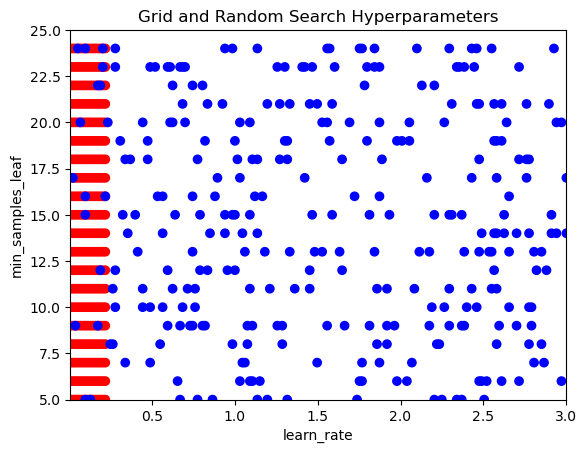

In [13]:
learn_rate_list = np.linspace(0.01, 3.0, 200)
min_samples_leaf_list = range(5, 25)

combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0, len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)